In [45]:
# Data Science pipeline
# Planning
# Acquire
# Prepare
# Explore
# Model
# Deliver

#
# Where we live today; Prepare, following train/test split, before EDA (Exploratory Data Analysis)

In [46]:
 #imports
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

### Planning:
### Create a classifier that predicts whether or not a party is a smoking table based on tip value and total bill

In [15]:
# Acquire the data:

In [16]:
df = data('tips')

In [47]:
# Prepare the data

In [48]:
# examine the data
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [51]:
# insert univariate exploration and data spread here in the preprocessing phase, encode 
# categorical variables if utilized, etc.

In [21]:
# dataframe (for our purposes) is cleaned and ready, lets split the data

In [57]:
train, test = train_test_split(df, train_size=0.8, random_state=1349)

In [58]:
train, validate = train_test_split(train, train_size=0.7, random_state=1349)

In [59]:
train.shape, validate.shape, test.shape

((136, 7), (59, 7), (49, 7))

In [60]:
# Last phase of Prepare: 
# beacuse we are fitting something to our data, ensure that we do it *after* the train/validate/test split

In [61]:
# create our scaler
# fit our scaler
# use our scaler

In [62]:
#createe the scaler
scaler_tip = MinMaxScaler()

In [63]:
# fit it
scaler_tip.fit(train[['tip']])

MinMaxScaler()

In [64]:
# use it

In [65]:
train['tip_minmax'] = scaler_tip.transform(train[['tip']])

In [67]:
train[['tip', 'tip_minmax']].head()

,tip,tip_minmax
52,2.60,0.177778
47,5.00,0.444444
108,4.29,0.365556
87,2.00,0.111111
59,1.76,0.084444


In [68]:
train[['tip', 'total_bill', 'tip_minmax']].describe()

,tip,total_bill,tip_minmax
count,136.000000,136.000000,136.000000
mean,2.993088,19.466029,0.221454
std,1.346018,8.786072,0.149558
min,1.000000,5.750000,0.000000
25%,2.000000,13.217500,0.111111
50%,3.000000,17.800000,0.222222
75%,3.532500,22.767500,0.281389
max,10.000000,50.810000,1.000000


In [69]:
# apply the saved scaler to our validate and test sets
validate['tip_minmax'] =scaler_tip.transform(validate[['tip']])
test['tip_minmax'] = scaler_tip.transform(test[['tip']])

<ipython-input-69-7749945138eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['tip_minmax'] = scaler_tip.transform(test[['tip']])


In [70]:
# streamline the process:
totalbillminmax = MinMaxScaler()
train['total_bill_minmax'] = totalbillminmax.fit_transform(train[['total_bill']])

(array([24., 35., 45., 16., 11.,  2.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

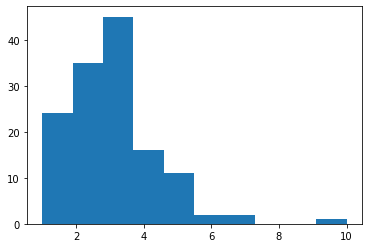

In [71]:
plt.hist(train['tip'])

(array([24., 35., 45., 16., 11.,  2.,  2.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

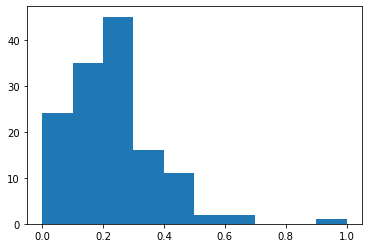

In [72]:
plt.hist(train['tip_minmax'])

In [73]:
train['robust_tip'] = RobustScaler().fit_transform(train[['tip']])
train['standard_tip'] = StandardScaler().fit_transform(train[['tip']])

<function matplotlib.pyplot.show(close=None, block=None)>

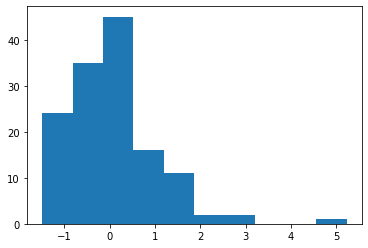

In [74]:
plt.hist(train['standard_tip'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

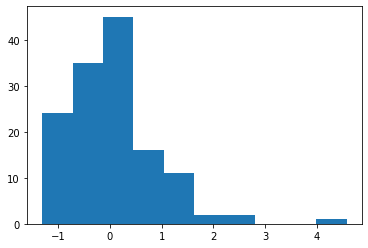

In [75]:
plt.hist(train['robust_tip'])
plt.show